# Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Loading libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt               #for plotting and EDA
import seaborn as sns                         #for plotting and EDA
from sklearn.linear_model import LogisticRegression             #classification model
from sklearn.tree import DecisionTreeClassifier                 #classification model
from sklearn.ensemble import RandomForestClassifier             #classification model
from sklearn.svm import SVC                                     #classification model
from sklearn.model_selection import train_test_split            #for splitting dataset into training and testing
from sklearn.metrics import accuracy_score                      #for checking model accuracy
from sklearn.metrics import roc_auc_score                       #for checking model accuracy
from sklearn.metrics import confusion_matrix, classification_report      #for checking model accuracy
from sklearn.model_selection import cross_val_score                      #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Telecom_customer_churn.csv')
df = pd.DataFrame(data = df)

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
pd.set_option('display.max_rows', None)

In [6]:
df.shape

(7043, 21)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges should've been float data type but it is object data type.

In [8]:
df.apply(lambda x: len(x.unique()))

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Most of the columns are of categorical data type with Yes and No values. Only tenure, MonthlyCharges and TotalCharges are of continuous data type.

# Checking and treating missing values

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present in the dataset.

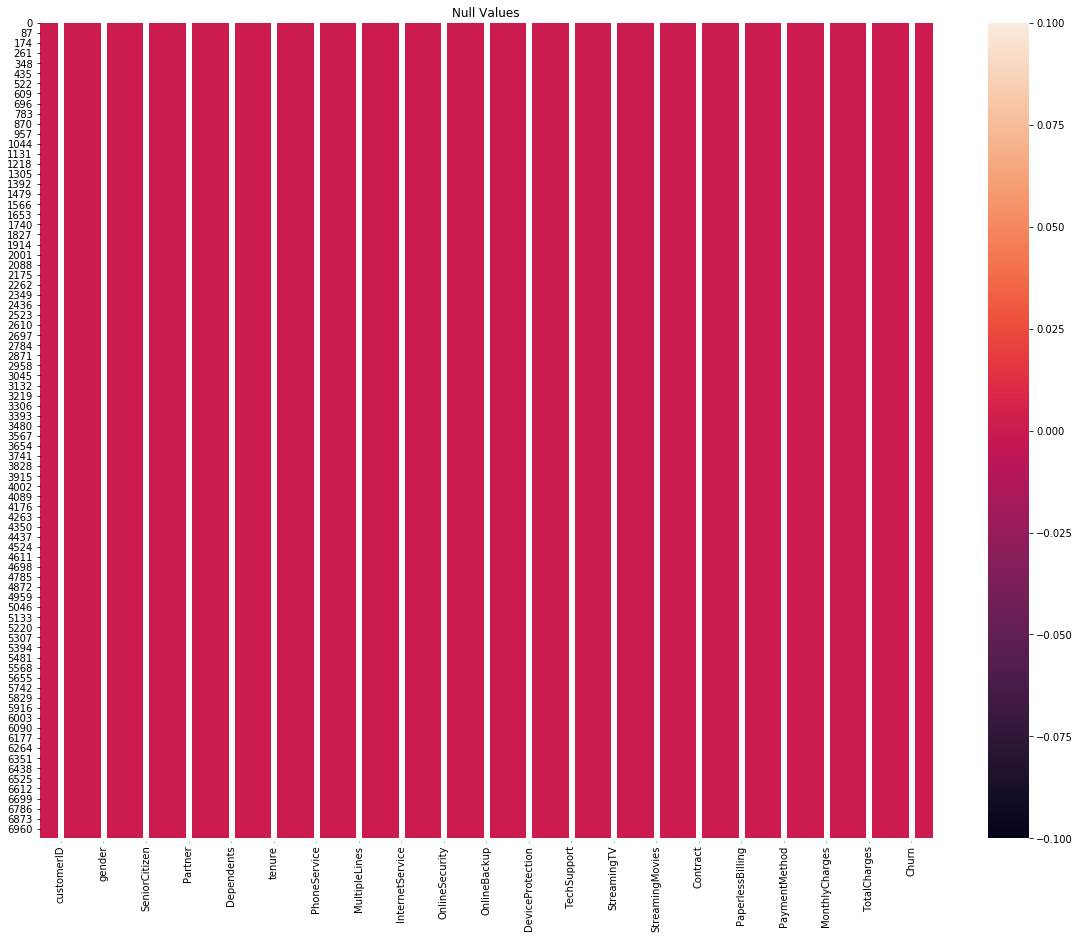

In [11]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.isnull(), annot = True)                           #Visual representation of no null values present in dataset
plt.title('Null Values')
plt.show()

In [17]:
df.loc[(df['TotalCharges'] == ' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
df['TotalCharges'].replace(' ', '0', inplace = True)

In [19]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [21]:
df.loc[(df['tenure'] == 0)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


Total Charges = Monthly Charges * Tenure.
Hence, Total Charges = 0 when Tenure is 0.

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Most of the customers tend to have a tenure of 29 months, with minimum tenure being of 0 and maximum of 72.

Mean of monthly charges is 64.76 and mode is 70.35. The range is 18.25 - 118.75 and IQR is 35.50 - 89.85.

Mean of Total Charges is 2279.73 and mode is 1394.55. The range of total charges is 0 - 8684.80 and IQR is 398.55 - 3786.60.

# EDA and Data Visualisation

In [23]:
s = (df.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [24]:
cate_cols.remove('customerID')
cate_cols.append('SeniorCitizen')

In [25]:
cate_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [26]:
cont_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

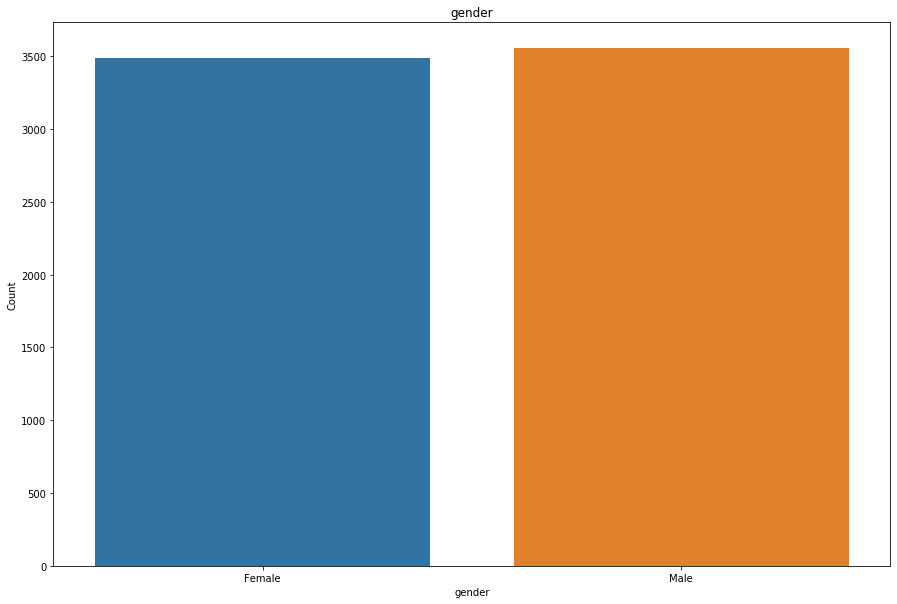

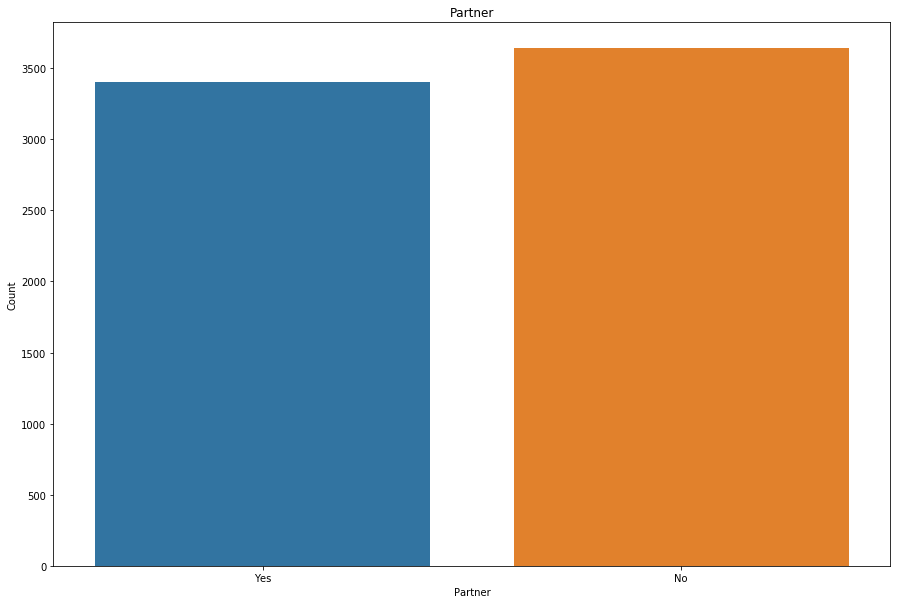

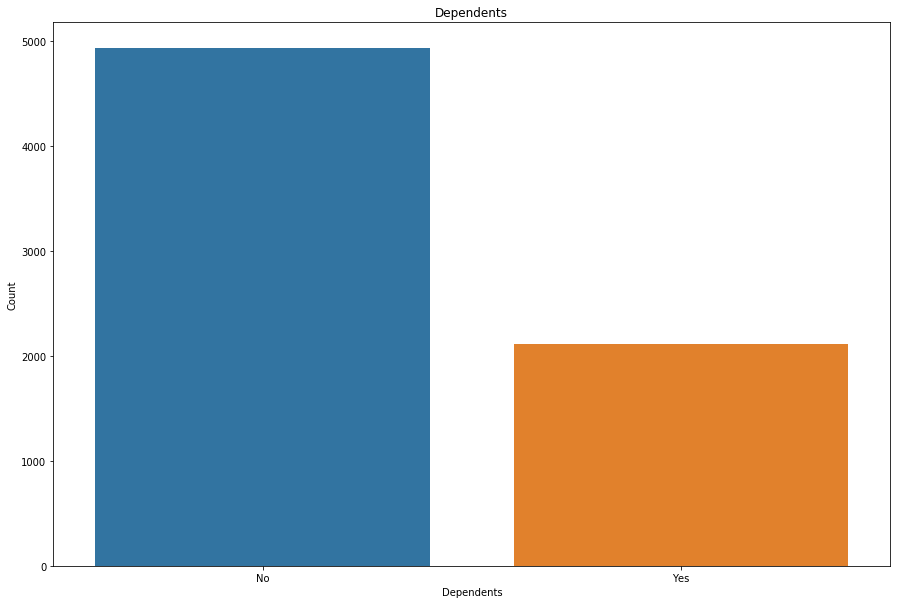

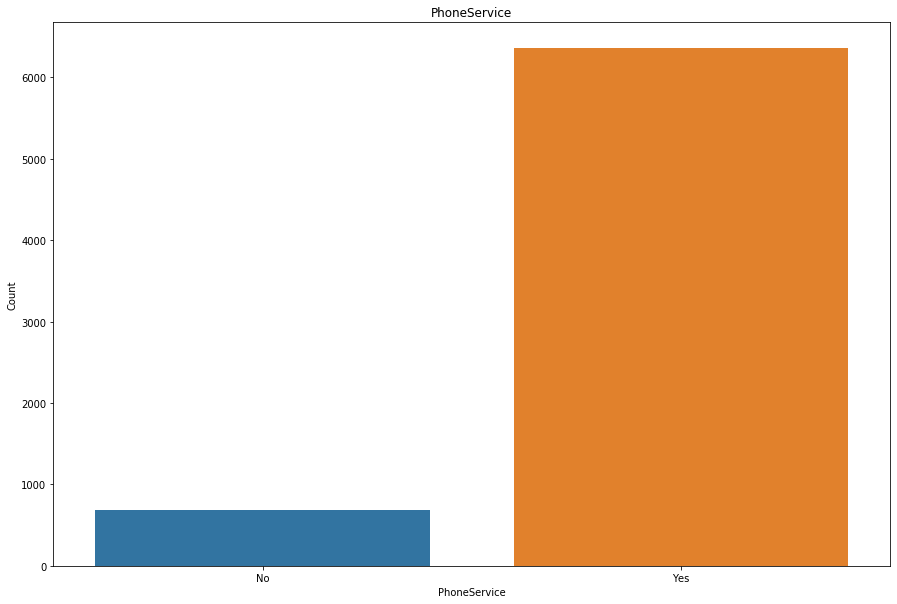

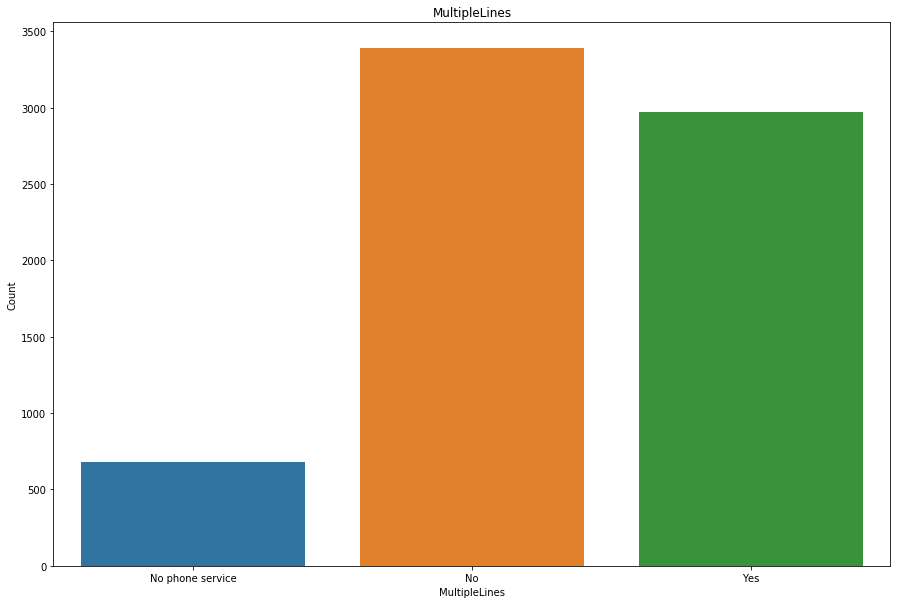

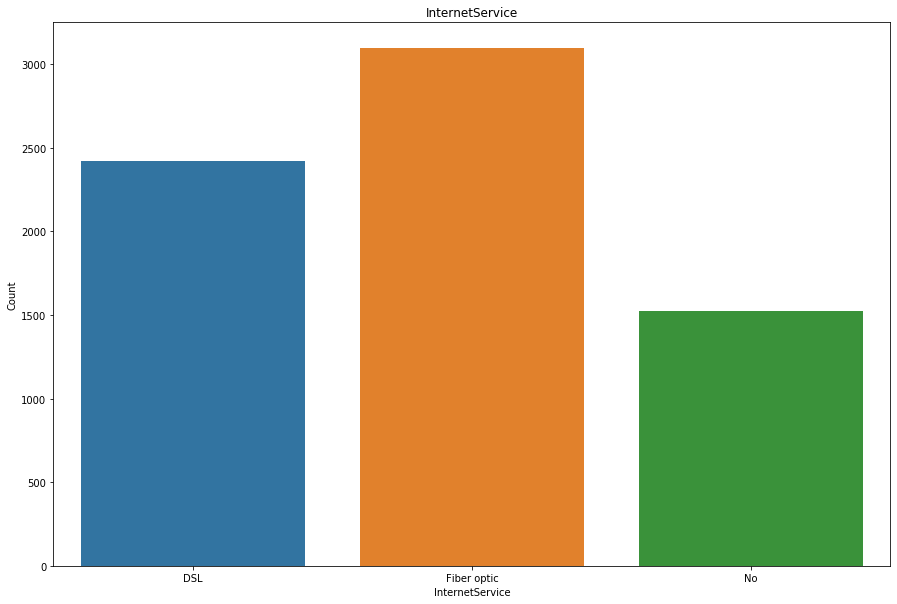

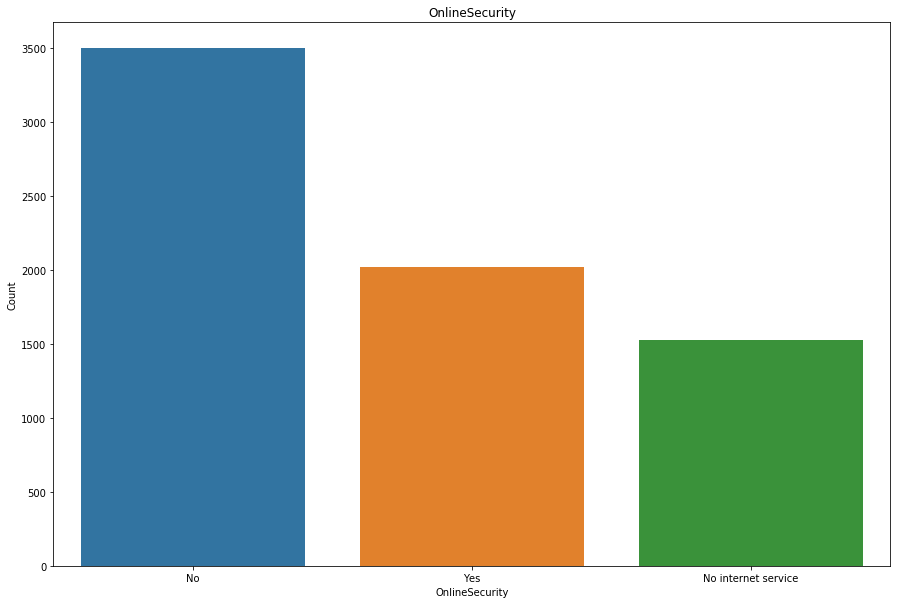

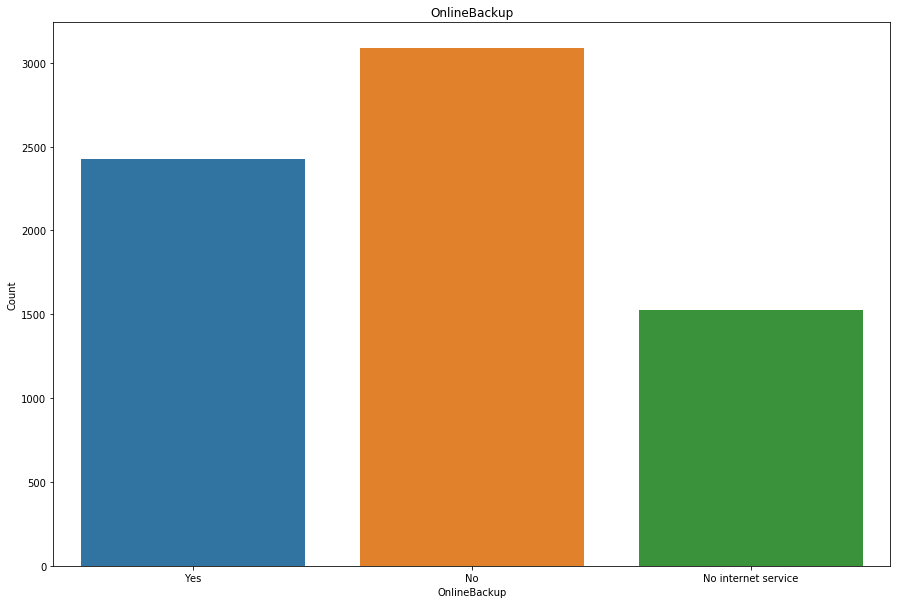

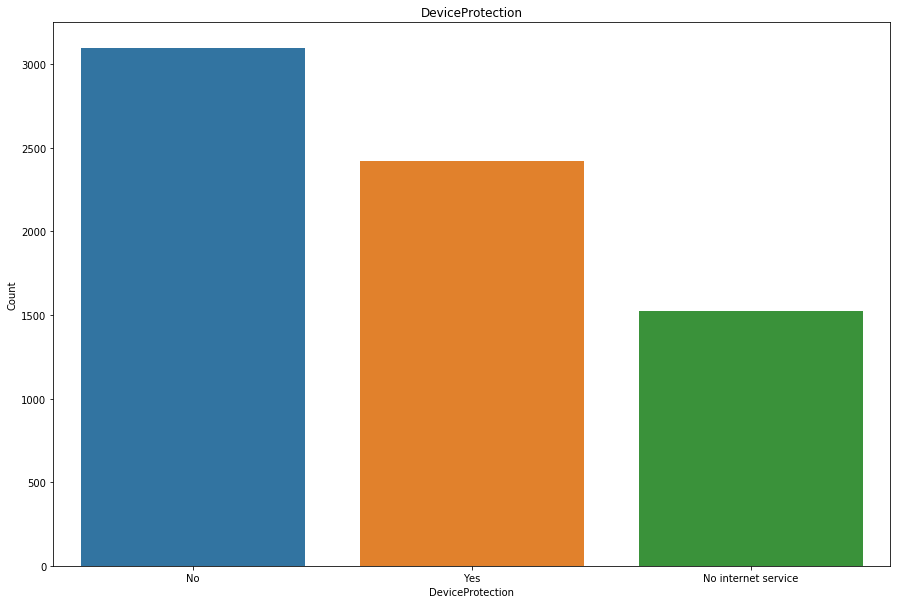

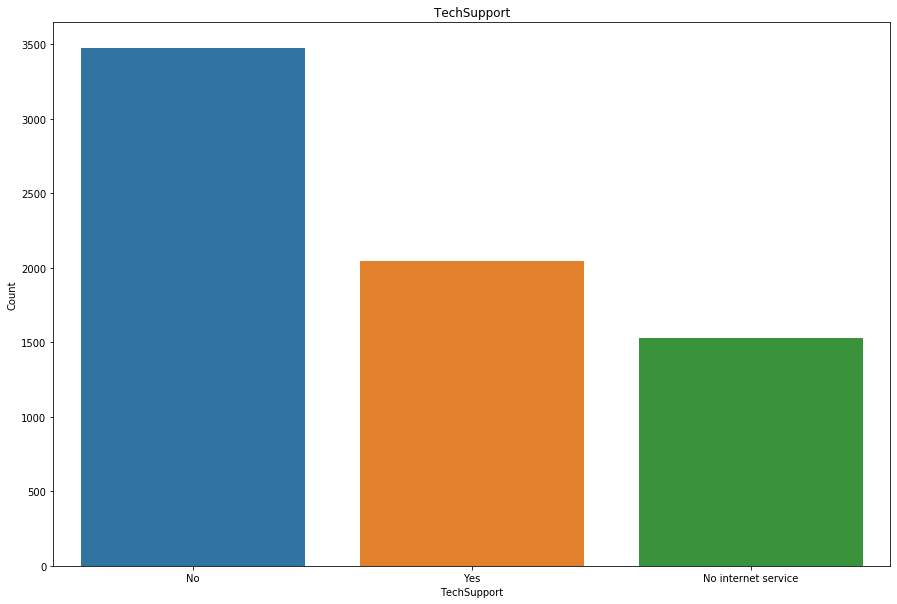

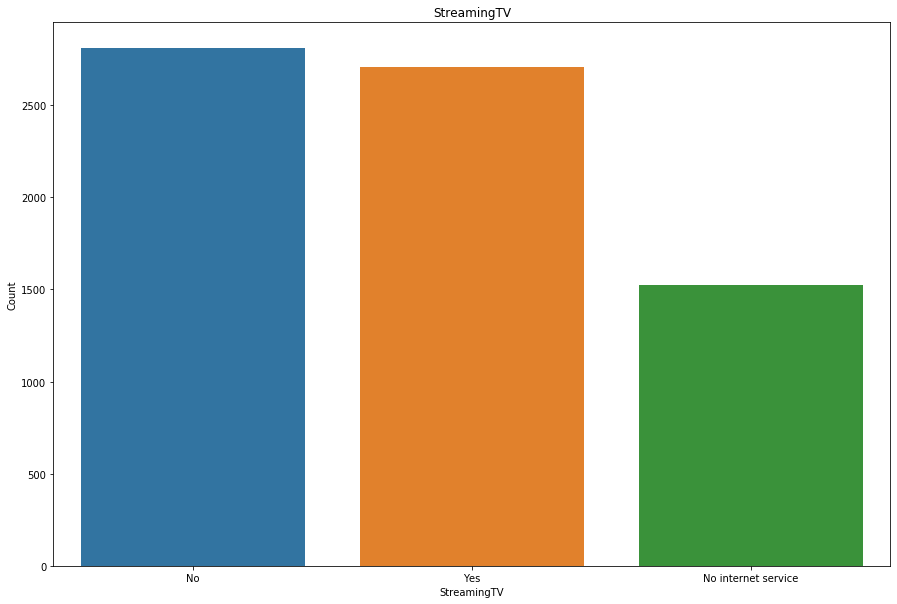

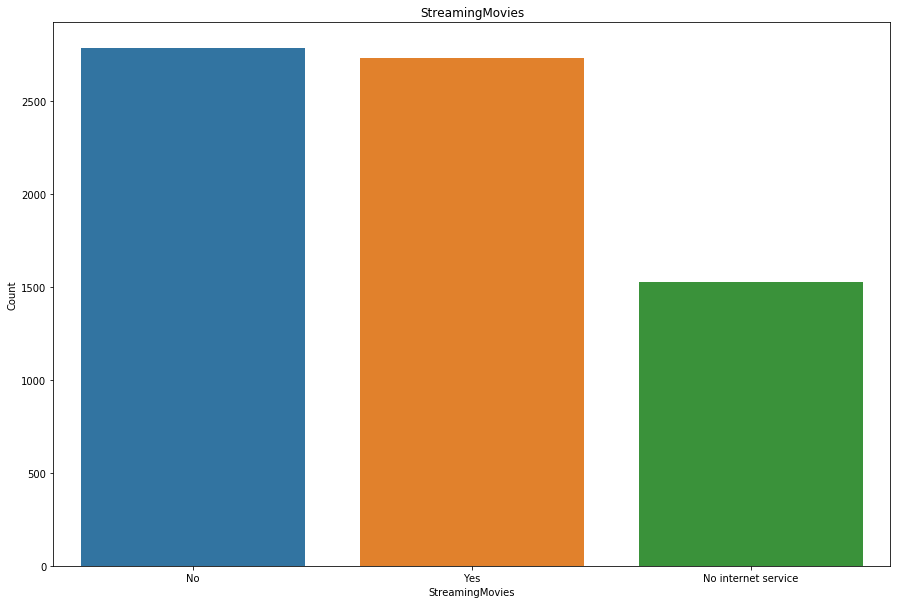

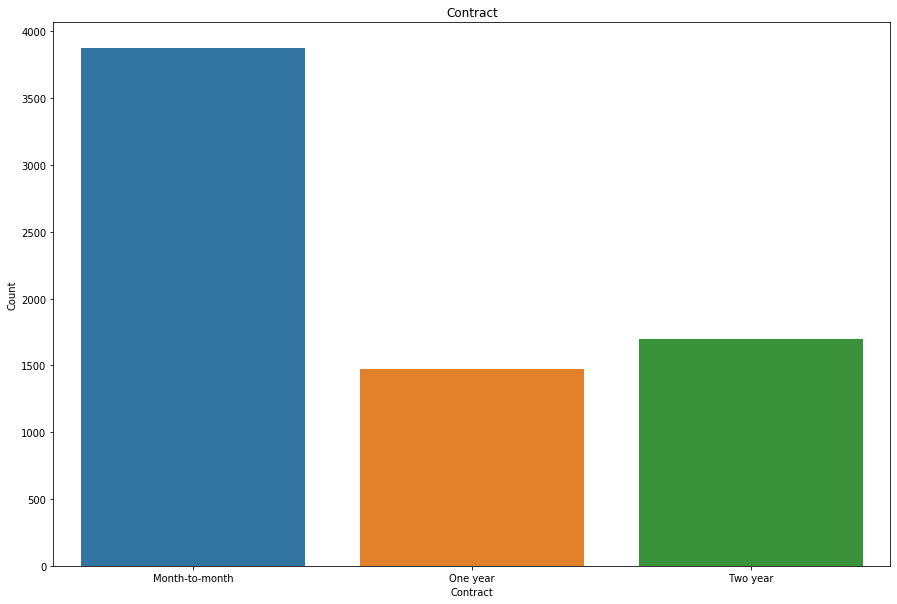

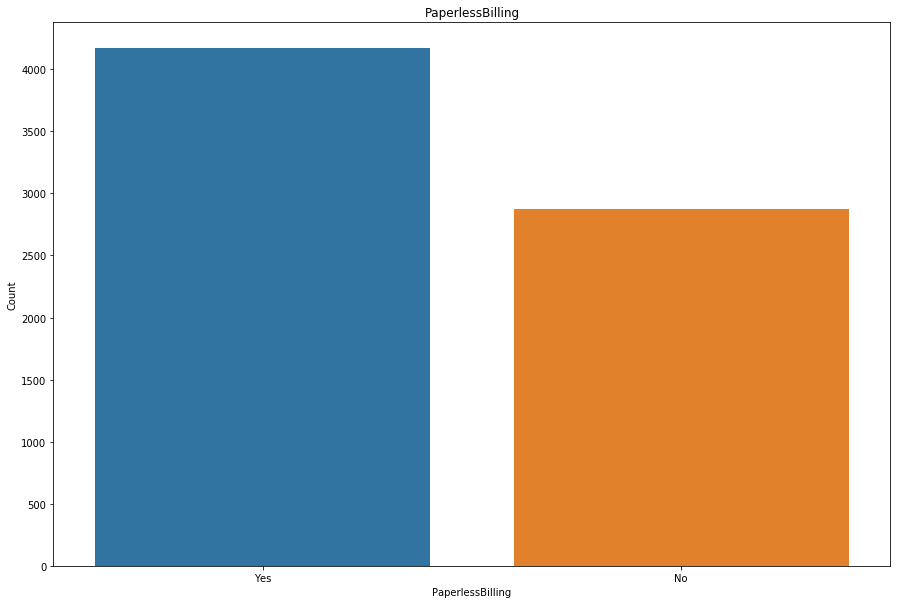

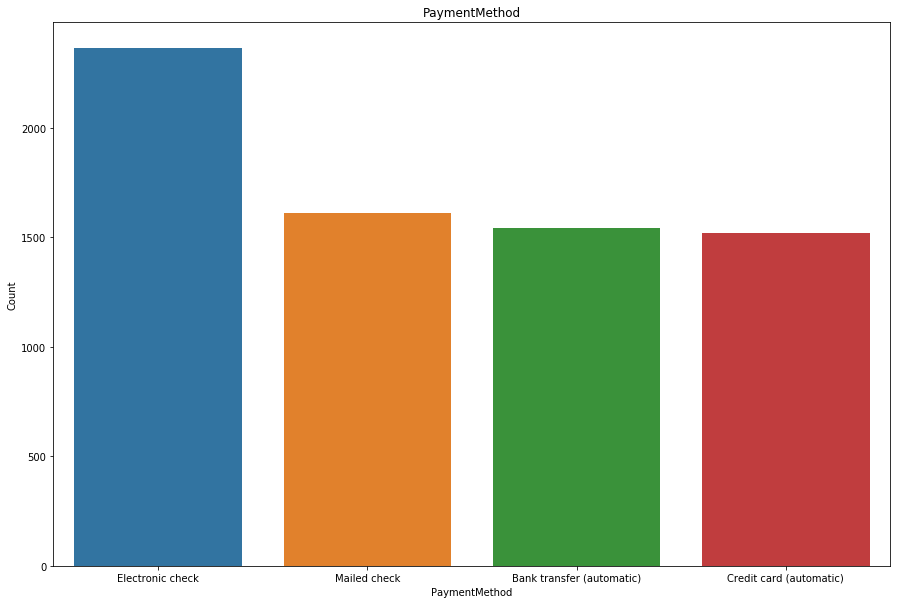

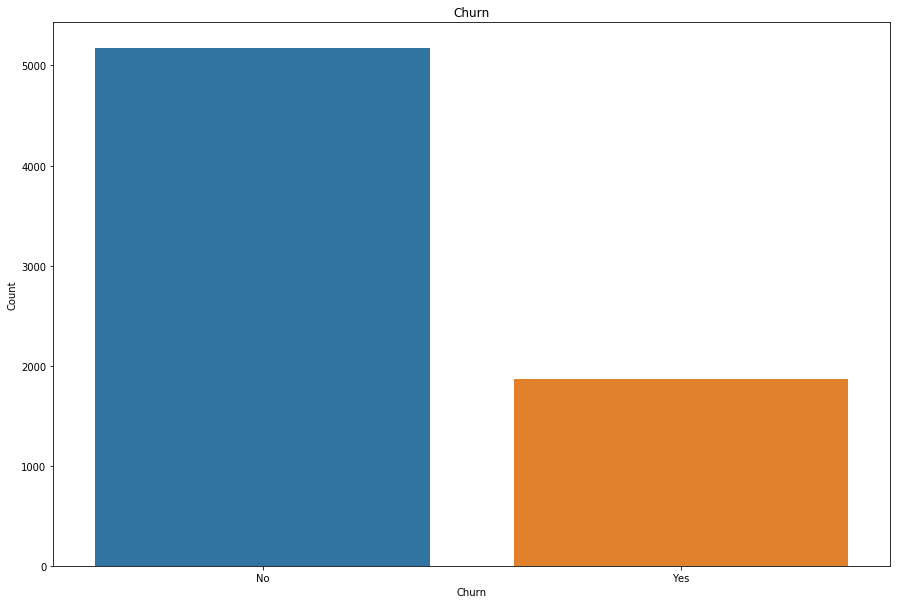

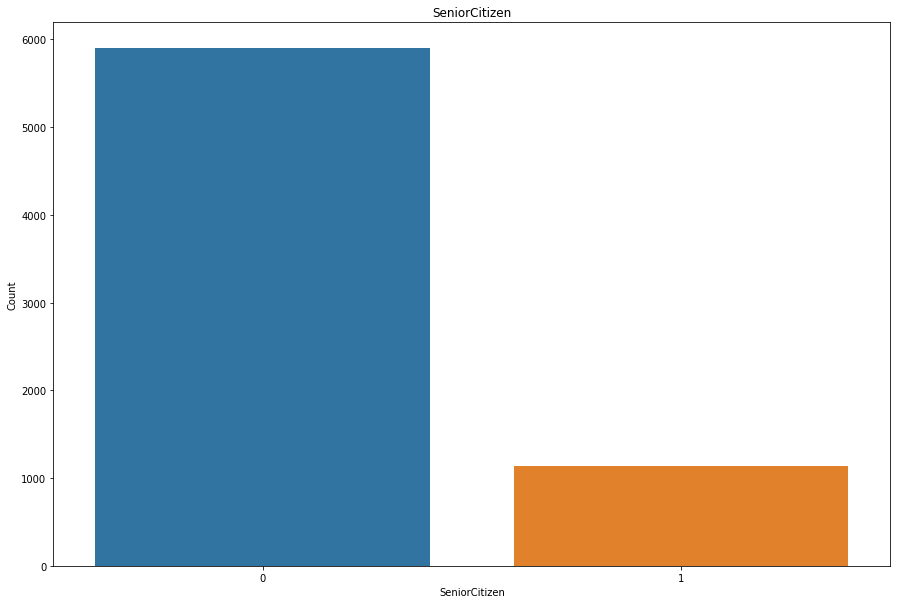

In [27]:
for i in cate_cols:
    plt.figure(figsize = (15, 10))
    plt.title(i)
    ax = sns.countplot(x = i, data = df)
    plt.xlabel(i)
    plt.ylabel('Count')

The gender ratio is almost 50-50, while same is the case with partners with customers with no partners slightly higher than the number of customers with partners. As for dependends the number of customer with dependents is almost half the number of customers with no dependents.

Majority of customers are for Phone service with number of customers single lines slightly higher than customers with multiplelines.

Customers opting for Internet Services tend to opt for fiber optic over DSL. Most of the customers with Internet services prefer not to opt for online security, online backup, device protection and tech support. While the case streaming TV and movies is of 50-50.

Customers prefer to pay month to month with electronic check being the prefered mode of payment for majority.

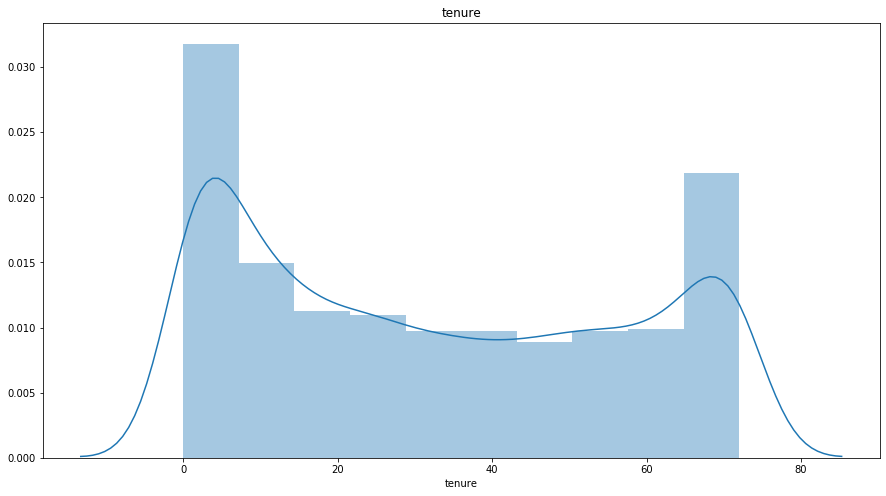

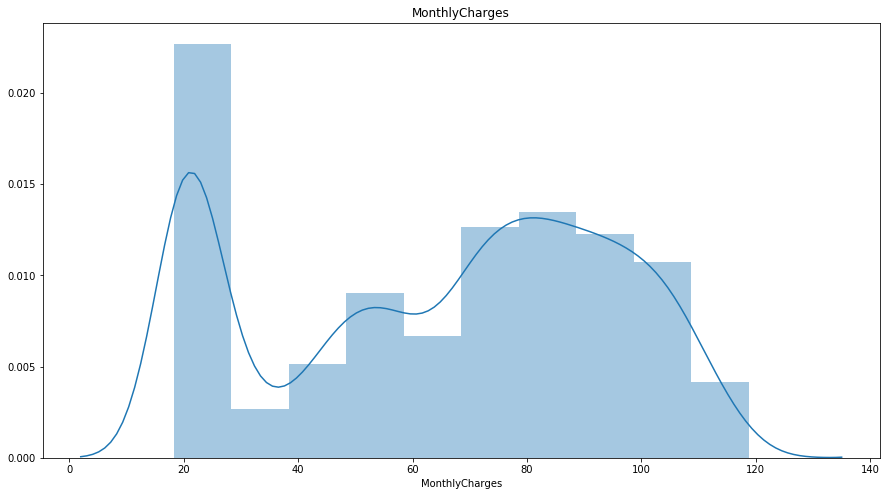

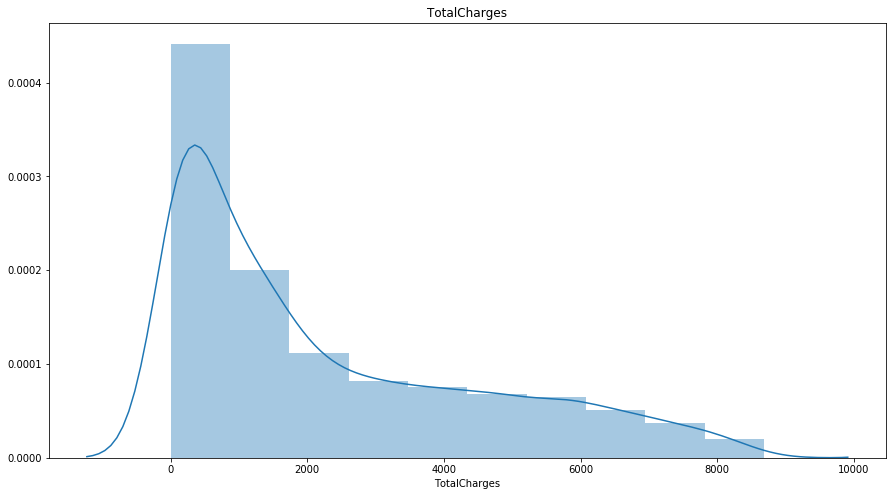

In [29]:
for i in df[cont_cols]:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 10)
    plt.title(i)
    plt.show()

Text(0.5, 1.0, 'Churn Percentage')

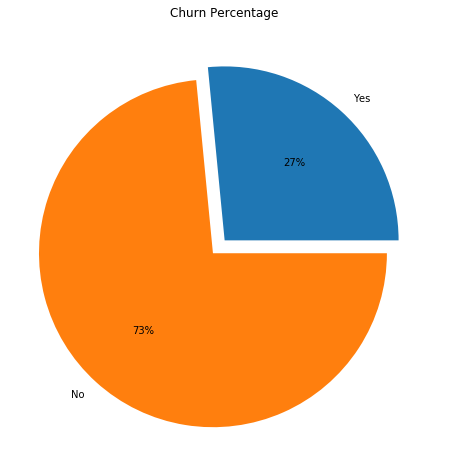

In [28]:
vals = [df.Churn[df.Churn == 'Yes'].count() , df.Churn[df.Churn == 'No'].count()]
plt.figure(figsize = (15, 8))
label = ["Yes" , "No"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0 , 0.1))
plt.title("Churn Percentage")

Out of 7043 only 27% of customers churn and 73% tends to stick with the telecom provider.

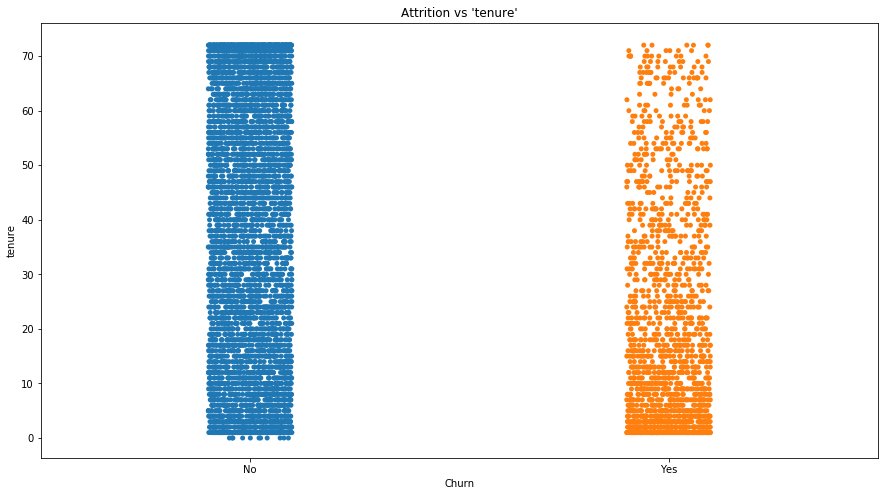

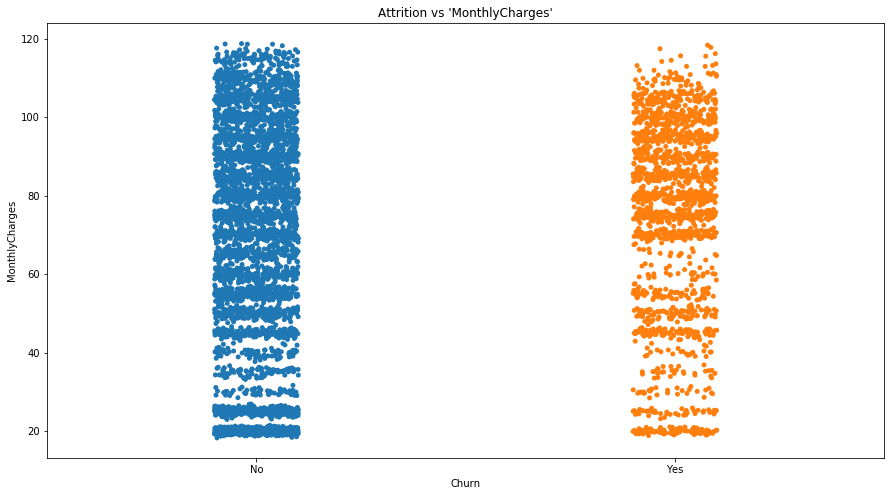

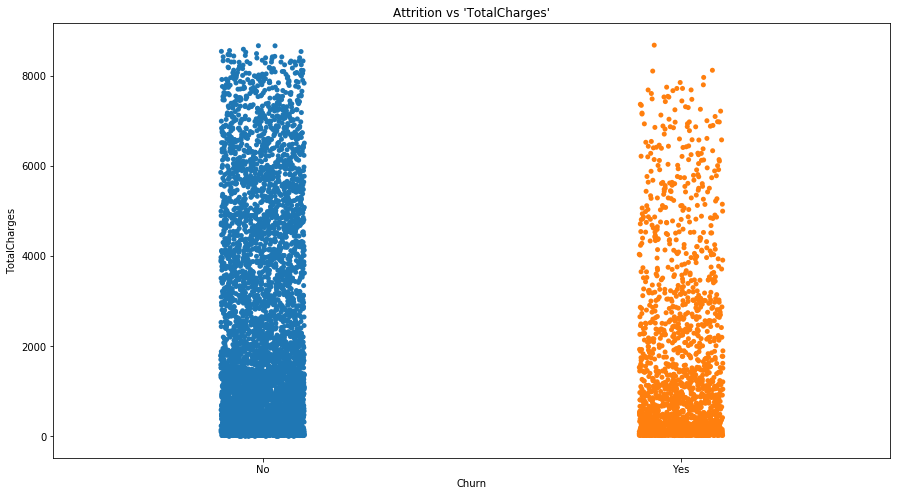

In [32]:
for i in cont_cols:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df['Churn'], df[i])
    ax.set(xlabel = 'Churn', ylabel = i)
    plt.title("Attrition vs '%s'"%i)
    plt.show()

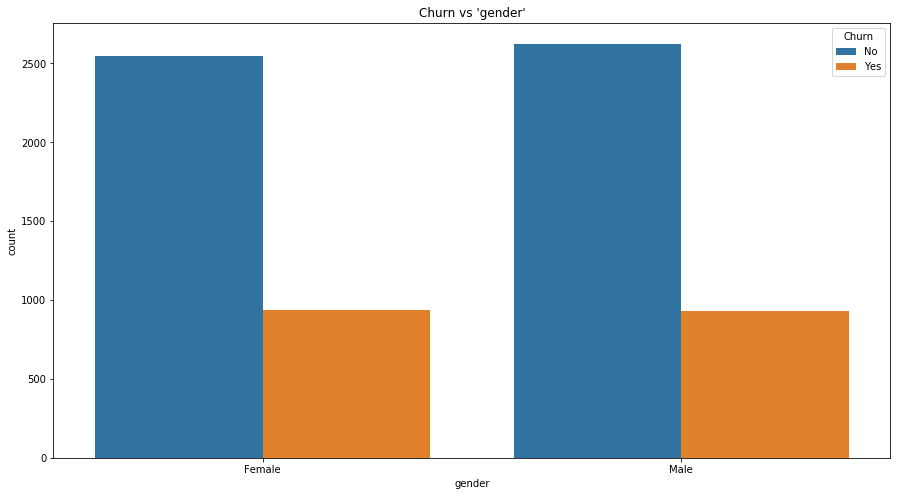

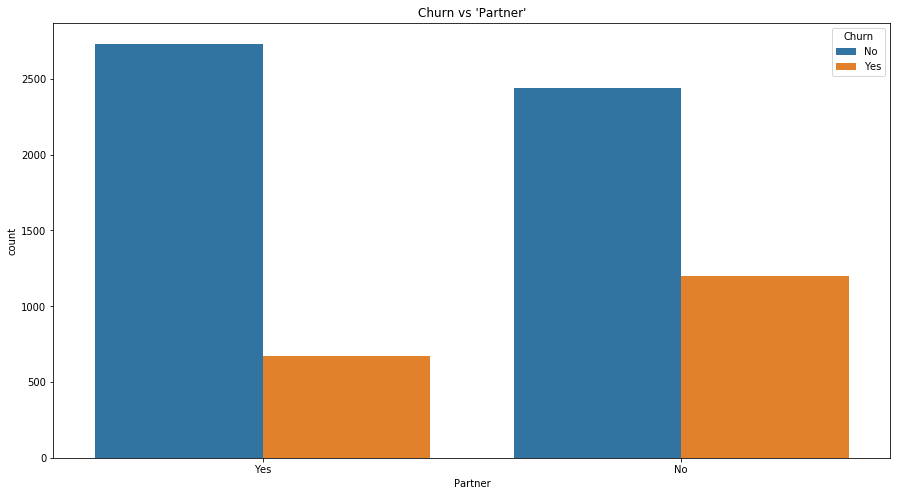

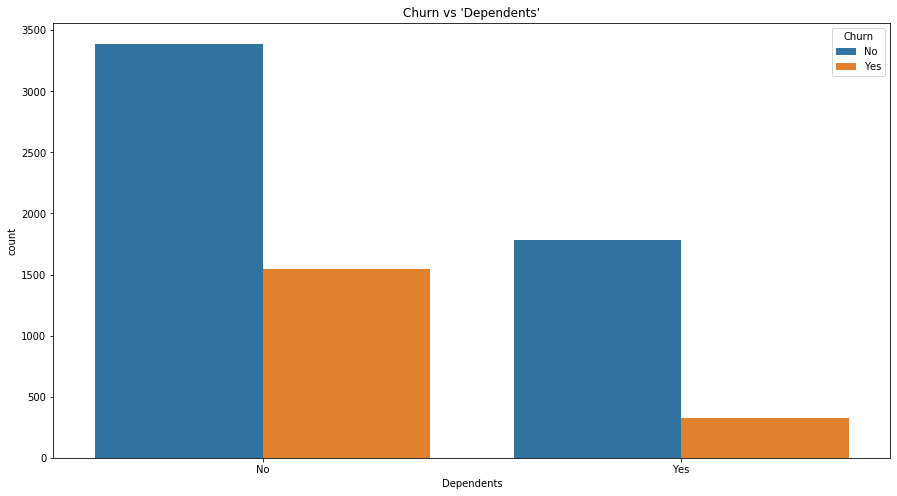

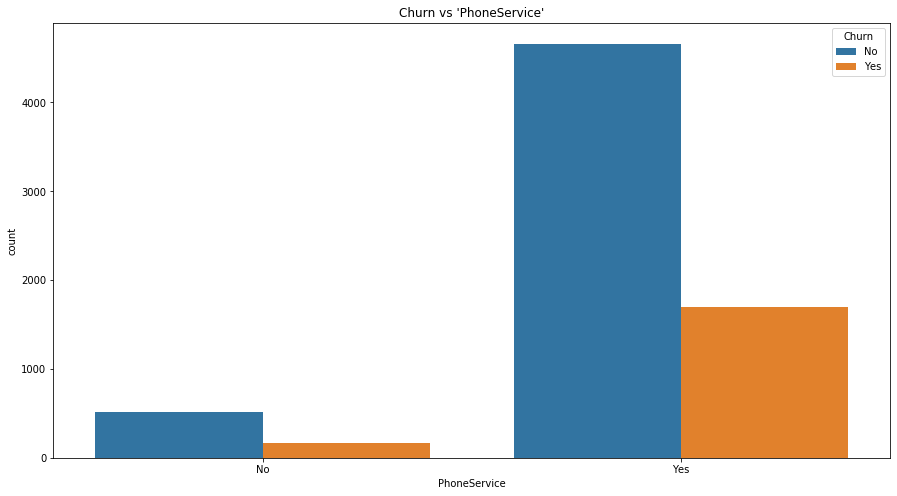

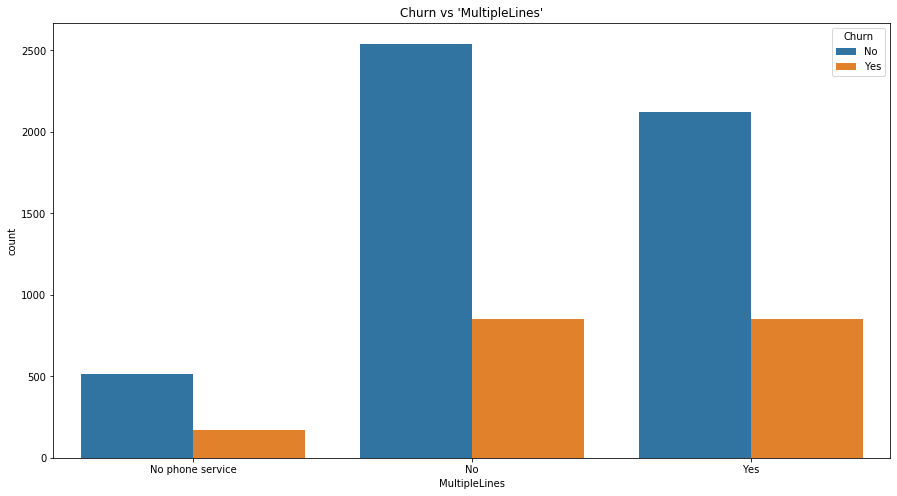

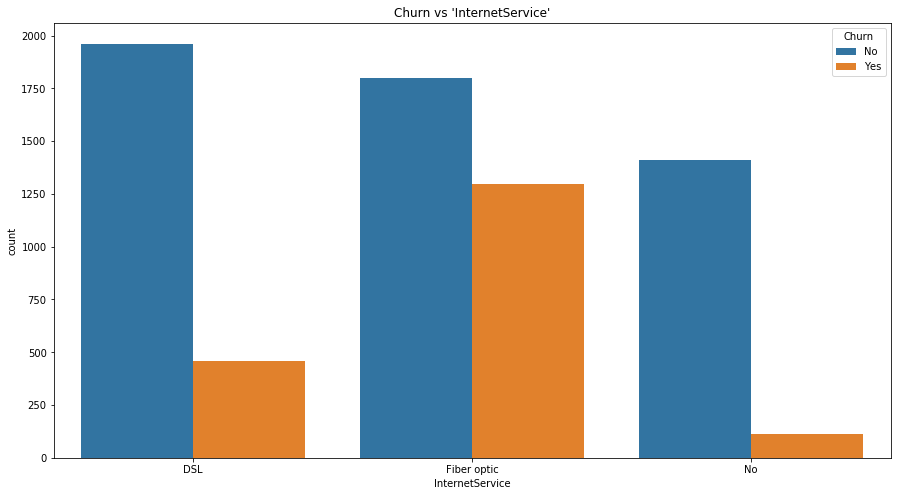

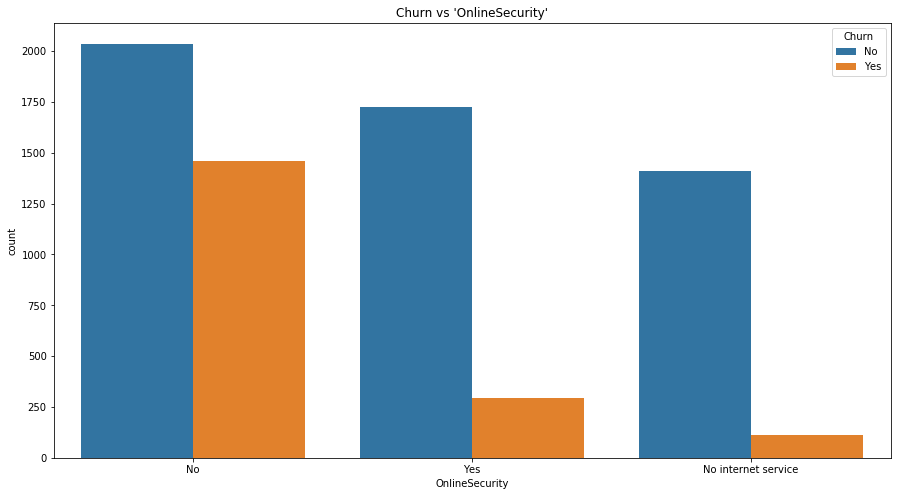

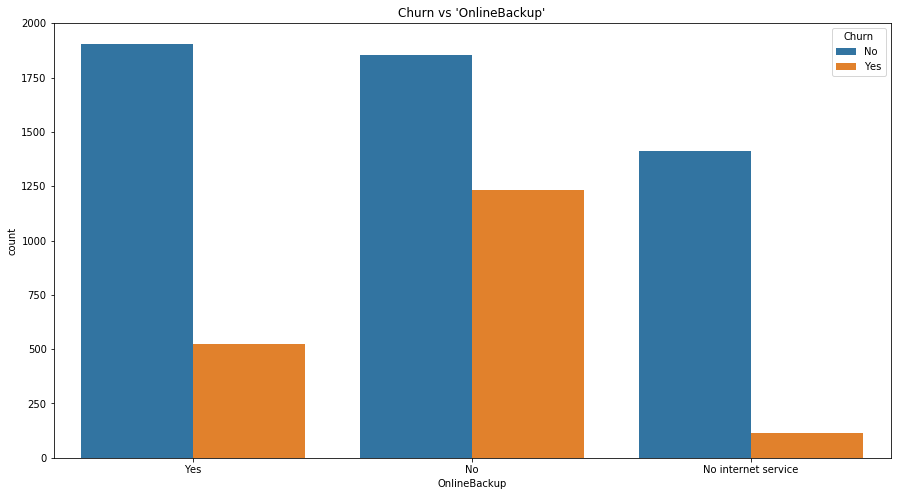

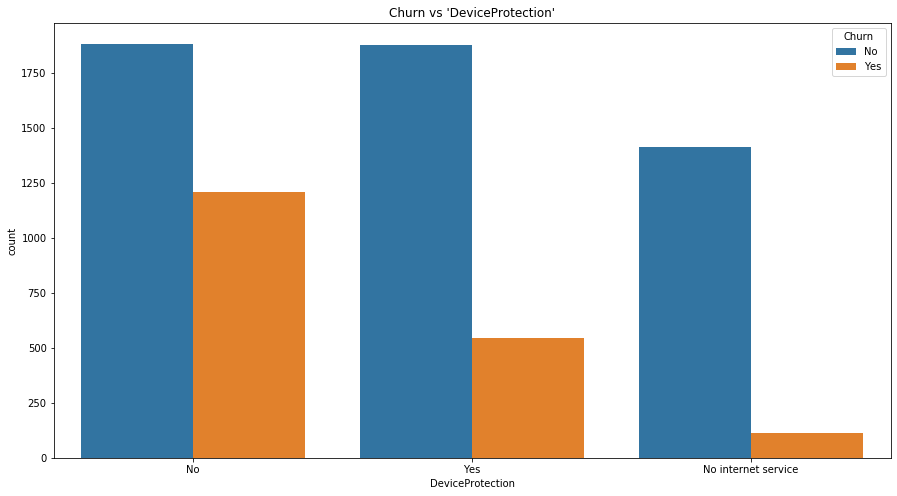

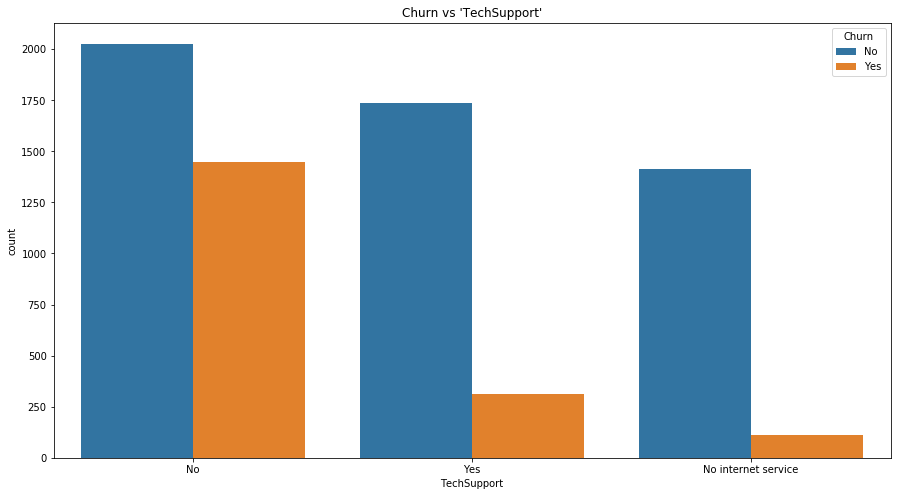

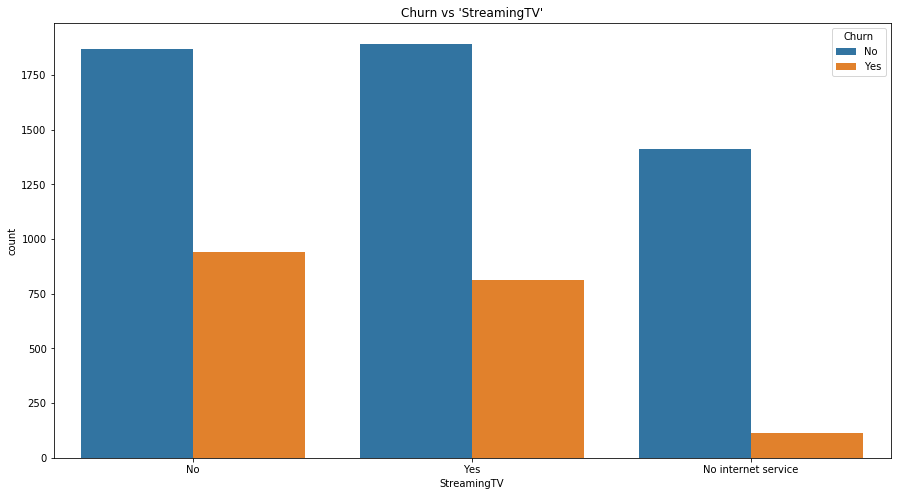

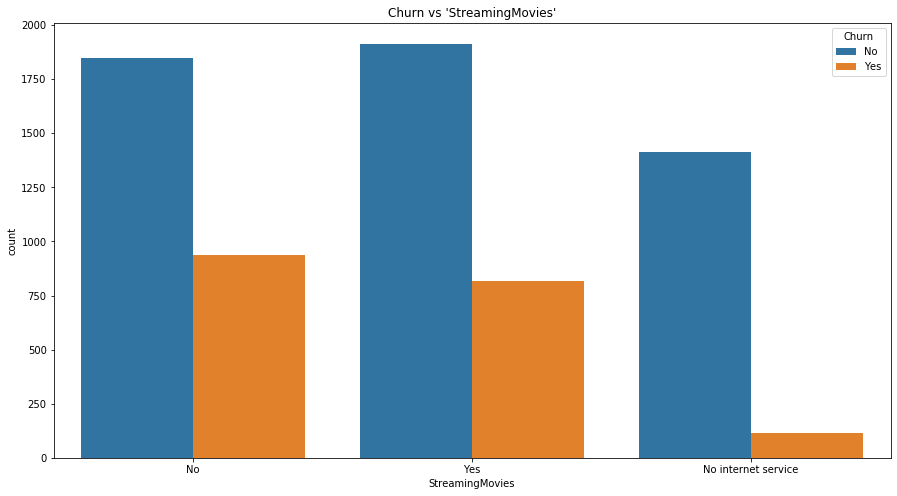

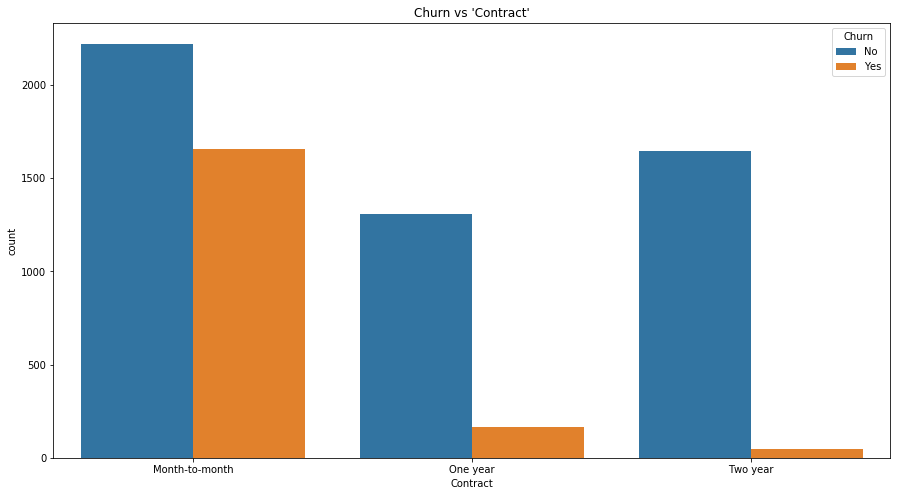

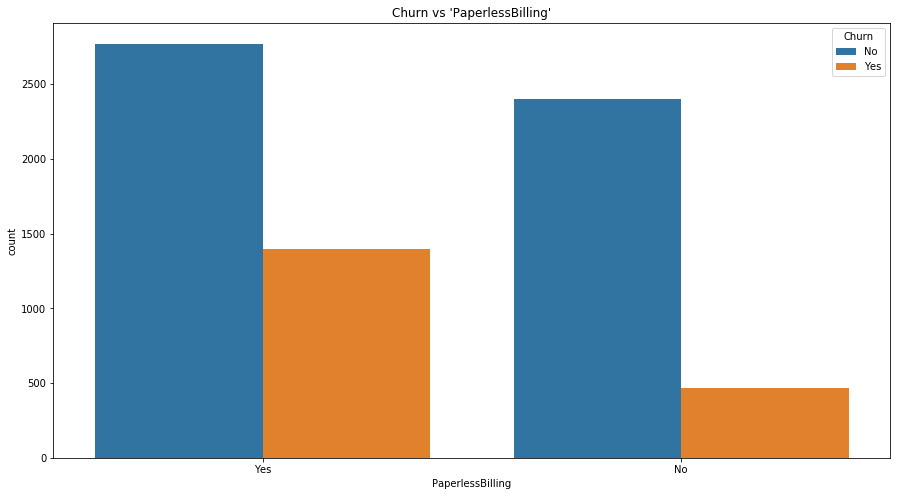

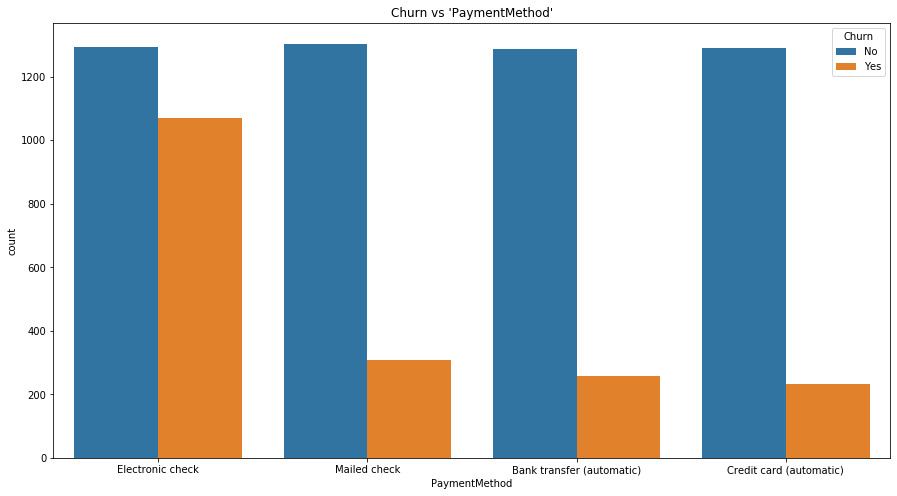

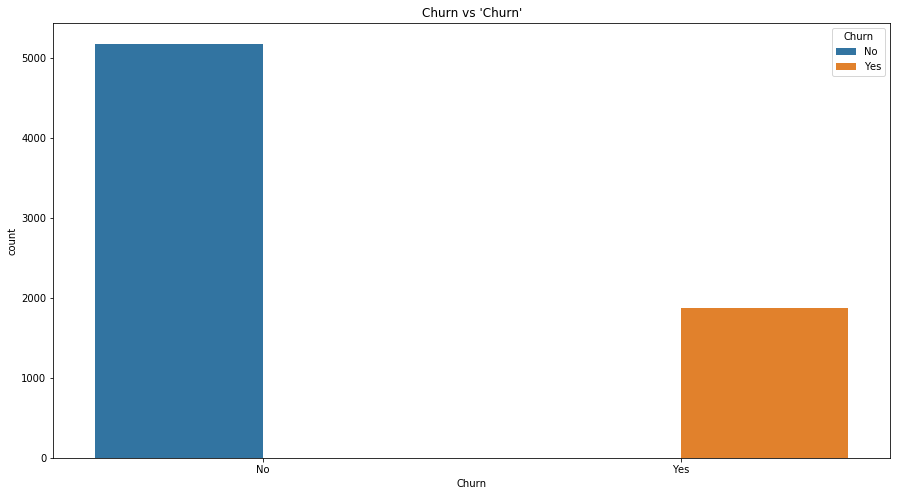

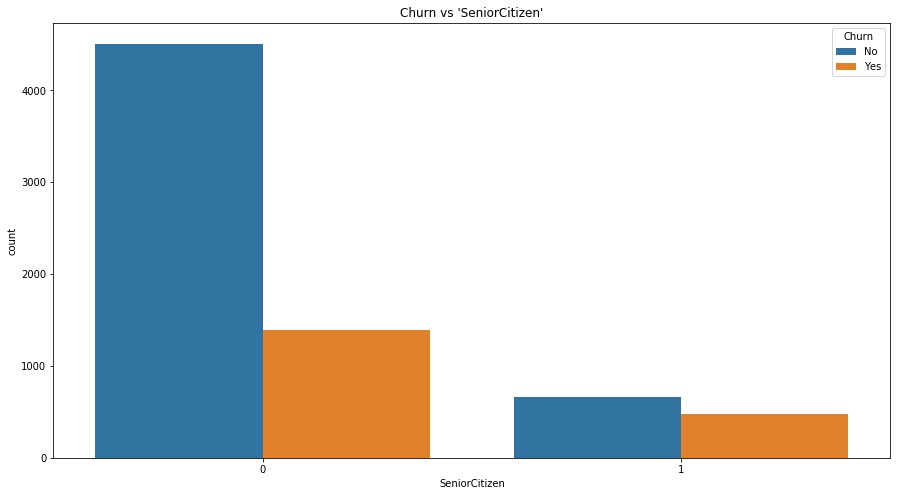

In [31]:
for i in cate_cols:                                #bivariate analysis
    plt.figure(figsize = (15, 8))
    plt.title("Churn vs '%s'"%i)
    sns.countplot(df[i], hue=df['Churn'])

Fiber Optic Internet service seems to have higher churn rate compared to DSL. While people who don't opt for online security, online backup, device protection, tech support also seems to have high churn chances.

People with month-to-month contracts also seems to have a very high churn rate in comparison with one year or two year contracted customers.

# Outliers and Skewness

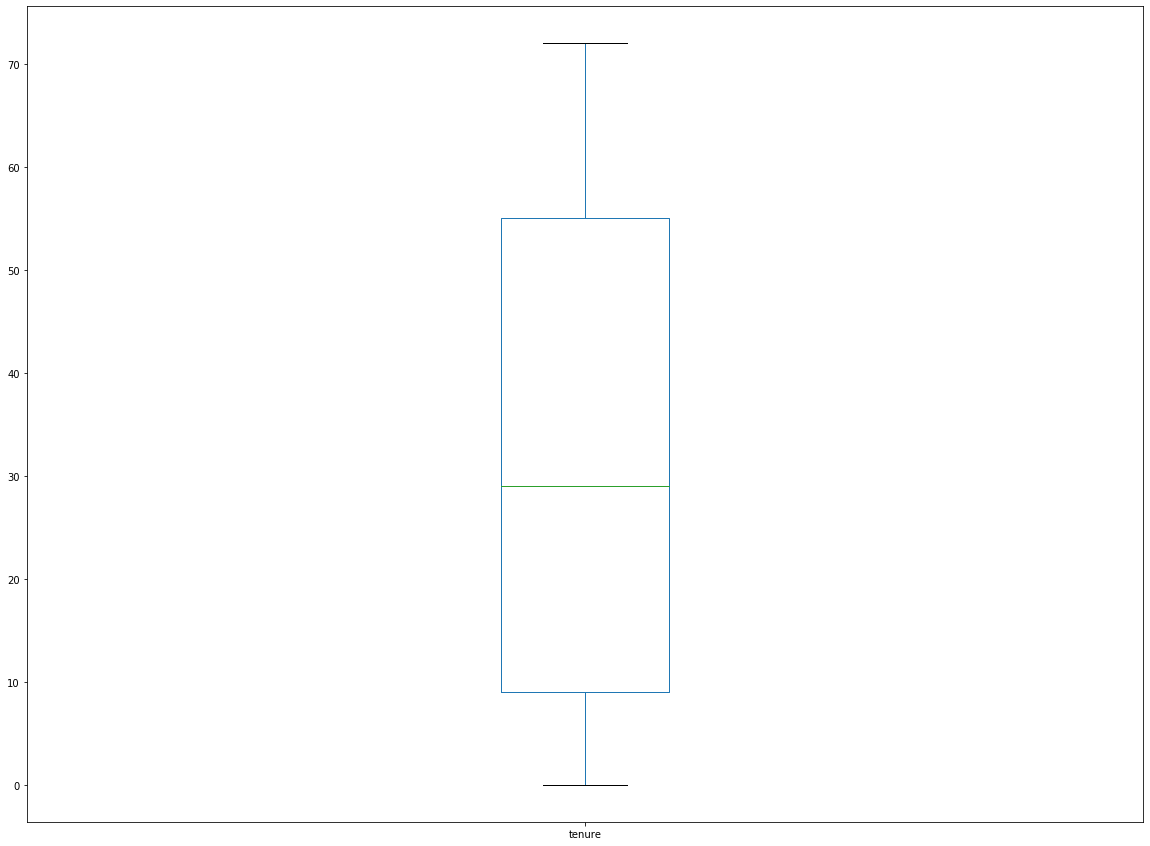

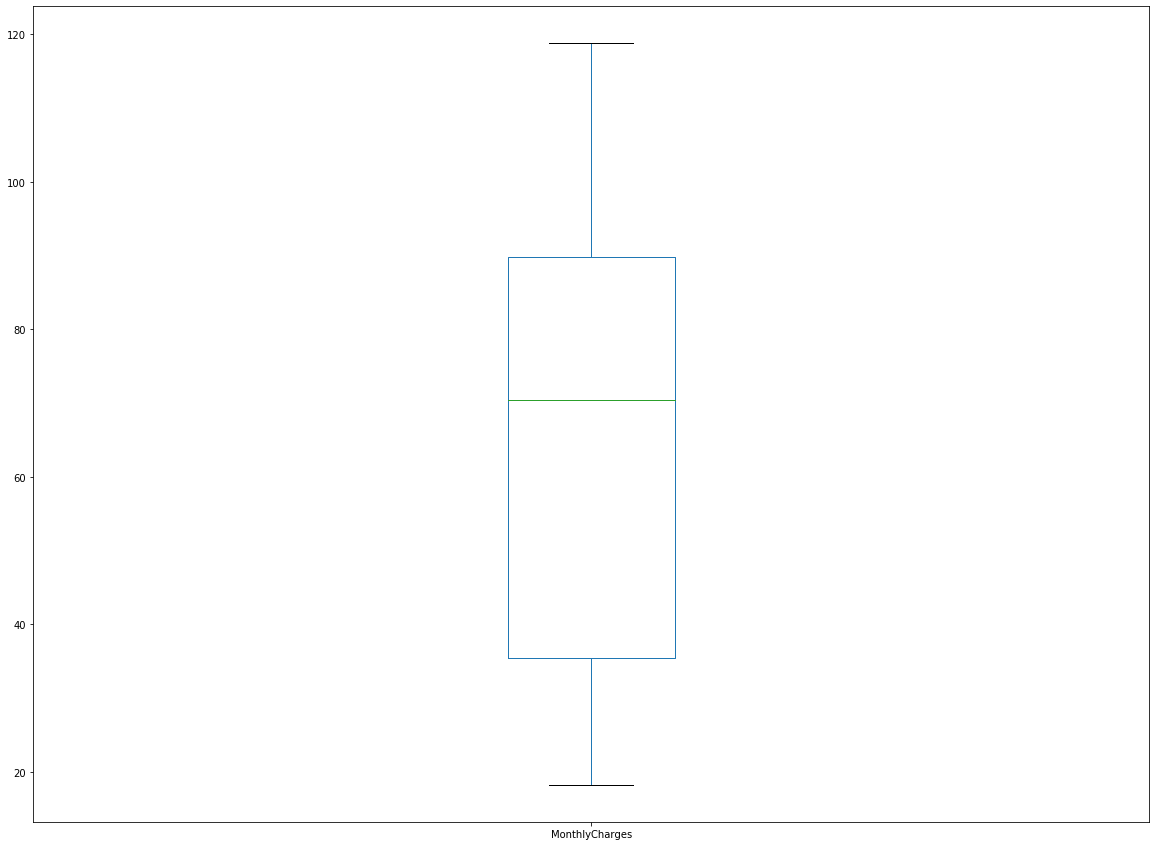

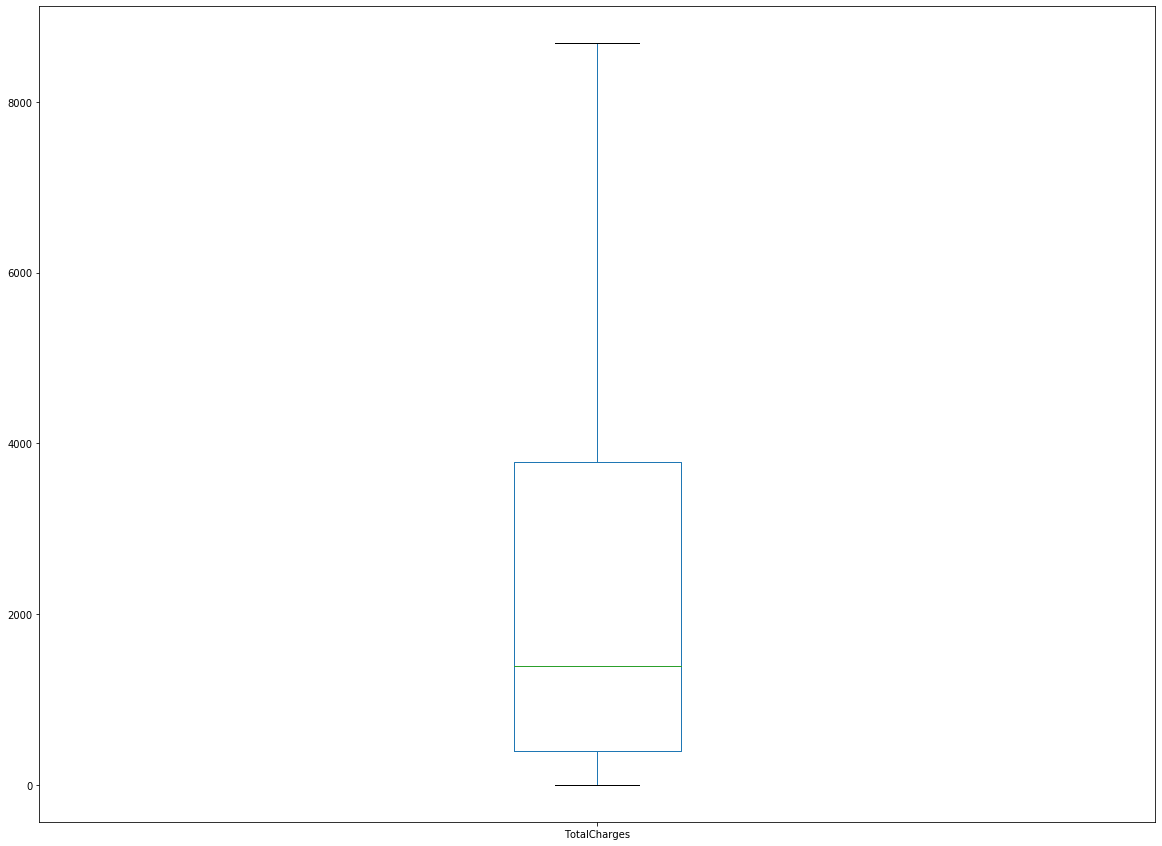

In [33]:
for i in cont_cols:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

In [34]:
df[cont_cols].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

TotalCharges is product of tenure and monthly charges, hence it is not an independent variable, so there is no need to treat it for skewness.

In [35]:
cate_cols.remove('SeniorCitizen')

In [36]:
cate_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cate_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [38]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3487.95,0


In [49]:
df = df.drop(columns = 'customerID')

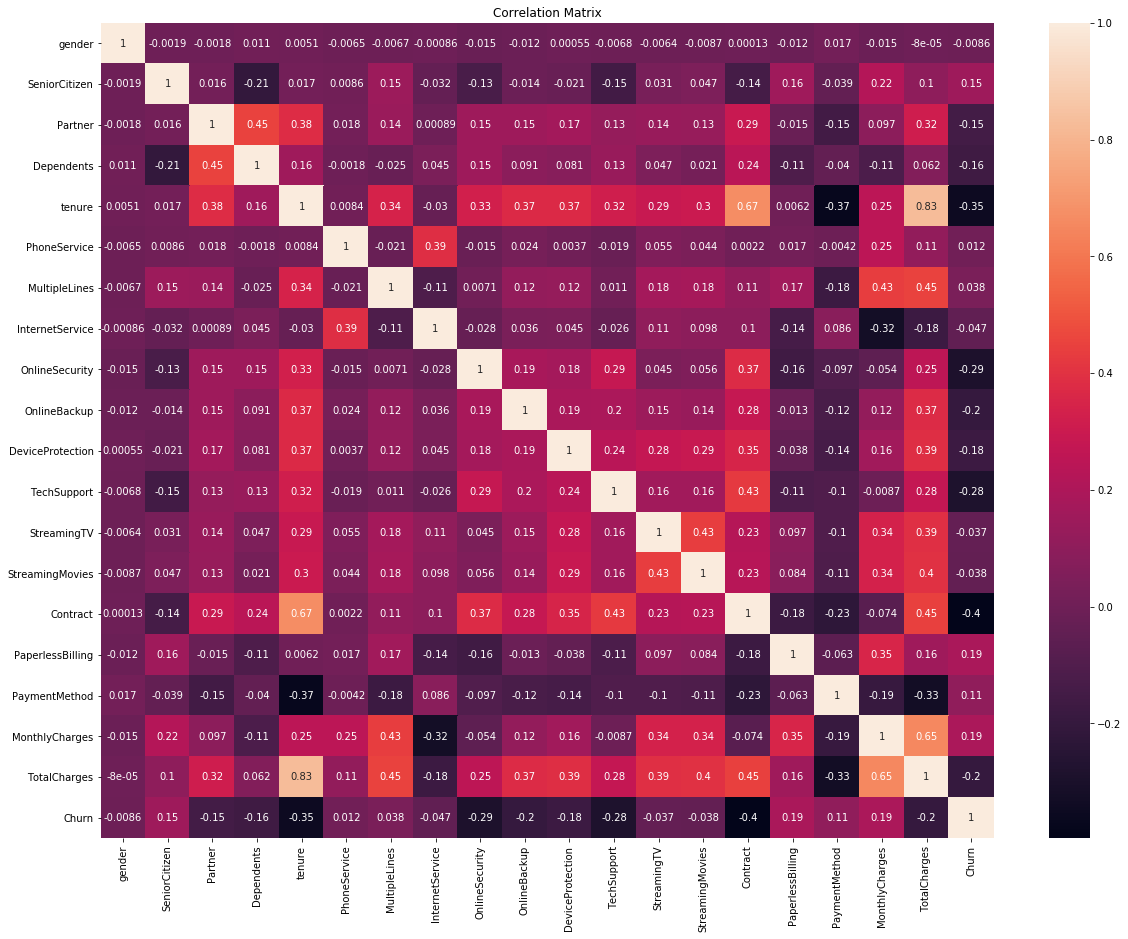

In [52]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

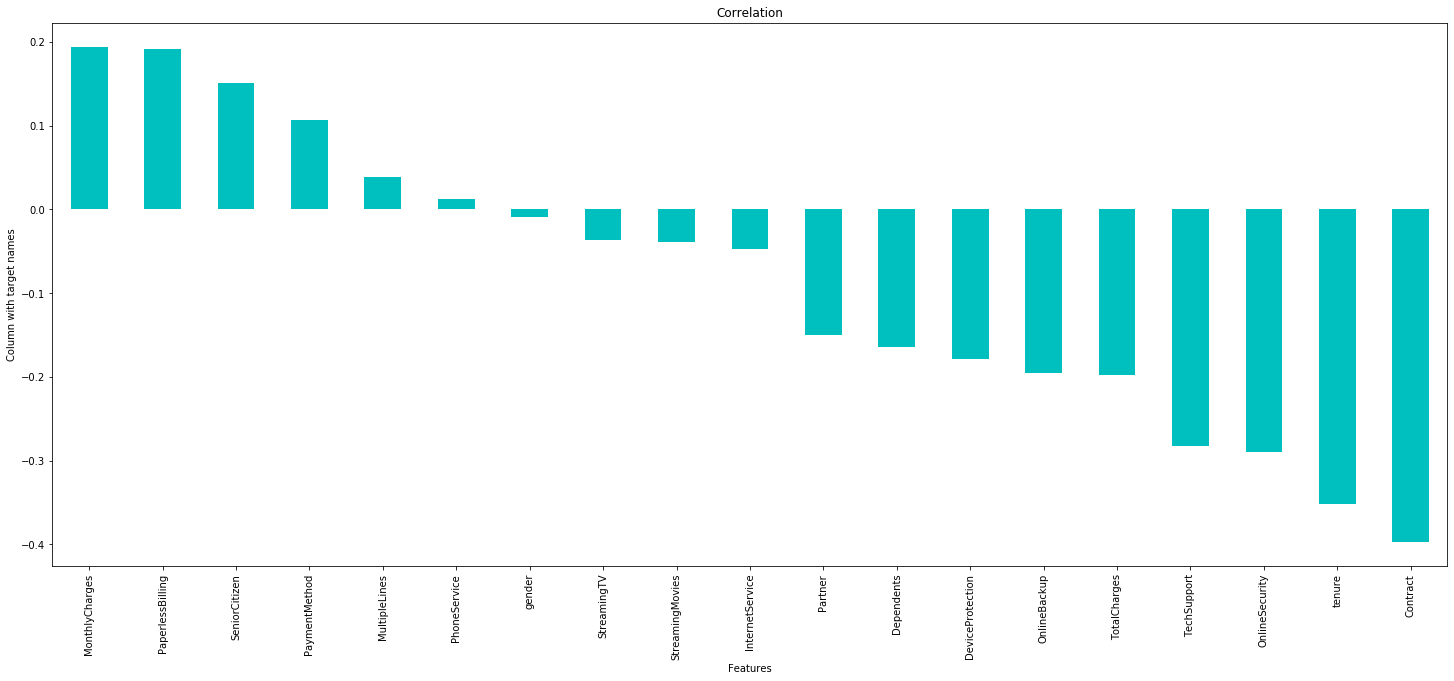

In [53]:
plt.figure(figsize = (25, 10))
df.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Contract have the highest correlation of -0.4 followed by tenure at -0.35. Apart from them online security and techsupport are also highly correlated at -0.29 and -0.28.

In [54]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

# Best Random State

In [55]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.8211074301940369 on Random State 129


# Creating Train Test Split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 129)

In [57]:
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
models = [LR, DTC, svc, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8211074301940369
[[1426  151]
 [ 227  309]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1577
           1       0.67      0.58      0.62       536

    accuracy                           0.82      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.82      0.82      2113

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
        

In [58]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  model is : 0.8017906397186915
 
Cross Validation Score for  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  model is : 0.7276719465771986
 
Cross Validation Score for  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_

Random Forest model has the accuracy score of 0.80 and cross validation mean of 0.79, hence it is the best model since the difference between accuracy score and cross val score is least.

# Hypertuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [61]:
rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
rfc.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [62]:
rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [63]:
rfc1=RandomForestClassifier(random_state=129, max_features='sqrt', n_estimators= 200, max_depth=7, criterion='entropy')
rfc1.fit(x_train, y_train)
predrfc1 = rfc1.predict(x_test)
print (accuracy_score(y_test, predrfc1))
print (confusion_matrix(y_test, predrfc1))
print (classification_report(y_test, predrfc1))

0.8106956933270232
[[1456  121]
 [ 279  257]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1577
           1       0.68      0.48      0.56       536

    accuracy                           0.81      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.80      0.81      0.80      2113



In [64]:
cvs = cross_val_score(rfc1, x, y, cv = 5)
print ('Cross Validation Score for ',rfc1, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=129,
                       verbose=0, warm_start=False)  model is : 0.8024996572359507


Both the accuracy and cv score increased by 0.1 after hypertuning with gridsearchcv.

In [65]:
import pickle

filename = 'ChurnRfc.pkl'
pickle.dump(rfc1, open(filename, 'wb'))

# Conclusion

In [66]:
loaded_model = pickle.load(open('ChurnRfc.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.8106956933270232


In [67]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predrfc1[:]], index = ['Predicted', 'Original'])

In [68]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112
Predicted,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Original,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
